<a href="https://colab.research.google.com/github/gonzalovaldenebro/NaturalLanguageProcessing-Portfolio/blob/main/F2_4_MarkovModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 195: Natural Language Processing
## Markov Models

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ericmanley/f23-CS195NLP/blob/main/F2_4_MarkovModels.ipynb)


## References

Markov chain on Wikipedia: https://en.wikipedia.org/wiki/Markov_chain

NLTK Book Chapter 2: Accessing Text Corpora and Lexical Resources https://www.nltk.org/book/ch02.html

What is ChatGPT Doing and Why Does it Work? By Stephen Wolfram: https://writings.stephenwolfram.com/2023/02/what-is-chatgpt-doing-and-why-does-it-work/
* This is a fascinating article that covers a lot of NLP topics. The opening motivates text generation with Markov-like descriptions.

In [26]:
#you shouldn't need to do this in Colab, but I had to do it on my own machine
#in order to connect to the nltk service
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


## Andrey Andreyevich Markov

<div>
<img src="https://github.com/ericmanley/f23-CS195NLP/blob/main/images/Andrei_Markov.jpg?raw=1" width="200"/>
</div>

image source: https://en.wikipedia.org/wiki/Andrey_Markov

## Markov Chain

A **Markov Chain** describes a sequence of possible events and the probabilities of transitioning from one event state to another.

It can be applied to text - what is the probability that one word follows another?

Here is a diagram which corresponds to this text:

`"I code when I am happy. I am happy therefore I code."`

<div>
<img src="https://github.com/ericmanley/f23-CS195NLP/blob/main/images/happy_markov_model.png?raw=1"/>
</div>


## Shakespeare Example

To be, or not to be, that is the question:
Whether 'tis nobler in the mind to suffer
The slings and arrows of outrageous fortune,
Or to take Arms against a Sea of troubles

<div>
<img src="https://github.com/ericmanley/f23-CS195NLP/blob/main/images/to_be_markov_model.png?raw=1"/>
</div>

Transitions here are shown as frequencies instead of probabilities.



## Demo: Let's see how we can construct the model for this text

`"I code when I am happy. I am happy therefore I code."`

We want to represent this model in a data structure - could use 2D-list/matrix or a nested dictionary

Nested dictionary representation


`{
 'I': {'am': 2, 'code': 2},
 'code': {'.': 1, 'when': 1},
 'when': {'I': 1}
 'am': {'happy': 2},
 'happy': {'.': 1, 'therefore': 1},
 'therefore': {'I': 1},
 '.': {'I': 1},
}`


## Digression: Let's talk about those dictionaries


We could use a regular ol dictionary for this. But if you want to use a dictionary to count how many times you see a word, there's something that is kind of annoying about them:


In [3]:
regular_dict = {}

#...
# I saw "chicken", so let's add on to the "chicken" counter
regular_dict["chicken"] += 1

KeyError: 'chicken'

but it might not already be in the dictionary, so you have to do something like this:

In [4]:
if "chicken" in regular_dict:
    regular_dict["chicken"] += 1
else:
    regular_dict["chicken"] = 1

print(regular_dict["chicken"])

1


It would be great if it just assumed a missing value was 0 instead of throwing an error!

That's what a `defaultdict` does:

In [5]:
from collections import defaultdict

my_ddict = defaultdict(int) #we're going to put ints in there - this tells it to make 0 the default

my_ddict["chicken"] += 1

print(my_ddict["chicken"])

1


*👍*

## Training a Markov Model

Before we start training our model, let's make a list the **tokens** - all of the words, punctuation, and other things we want to be the states of the model.

You can use the string `split` method for this:


In [6]:
text = "I code when I am happy . I am happy therefore I code . "
text_tokens = text.split()

print(text_tokens)

['I', 'code', 'when', 'I', 'am', 'happy', '.', 'I', 'am', 'happy', 'therefore', 'I', 'code', '.']


Now let's build the model using this list

In [27]:
from collections import defaultdict
from pprint import pprint

# this is our dictionary of dictionaries -
# lambda: defaultdict(int) just means I want a bunch of defaultdicts of ints
transition_counts = defaultdict(lambda: defaultdict(int))

for idx in range(len(text_tokens)-1):
    current_token = text_tokens[idx]
    next_token = text_tokens[idx+1]
    transition_counts[current_token][next_token] += 1

pprint(transition_counts)

defaultdict(<function <lambda> at 0x14ff6a340>,
            {'.': defaultdict(<class 'int'>, {'I': 1}),
             'I': defaultdict(<class 'int'>, {'code': 2, 'am': 2}),
             'am': defaultdict(<class 'int'>, {'happy': 2}),
             'code': defaultdict(<class 'int'>, {'when': 1, '.': 1}),
             'happy': defaultdict(<class 'int'>, {'.': 1, 'therefore': 1}),
             'therefore': defaultdict(<class 'int'>, {'I': 1}),
             'when': defaultdict(<class 'int'>, {'I': 1})})


## Let's make this into a function

I'll call the list of tokens **corpus** - which is another word for a body of text you use to train a model


In [8]:
def train_markov_model(corpus):
    # this is our dictionary of dictionaries -
    # lambda: defaultdict(int) just means I want a bunch of defaultdicts of ints
    transition_counts = defaultdict(lambda: defaultdict(int))

    for idx in range(len(corpus)-1):
        current_token = corpus[idx]
        next_token = corpus[idx+1]
        transition_counts[current_token][next_token] += 1

    return transition_counts

to_be = "To be , or not to be , that is the question : Whether 'tis nobler in the mind to suffer The slings and arrows of outrageous fortune , Or to take Arms against a Sea of troubles ,"
to_be_tokens = to_be.lower().split() #convert to lowercase and break apart by spaces into a list
to_be_model = train_markov_model(to_be_tokens)

pprint(to_be_model)

defaultdict(<function train_markov_model.<locals>.<lambda> at 0x13f2e5300>,
            {"'tis": defaultdict(<class 'int'>, {'nobler': 1}),
             ',': defaultdict(<class 'int'>, {'or': 2, 'that': 1}),
             ':': defaultdict(<class 'int'>, {'whether': 1}),
             'a': defaultdict(<class 'int'>, {'sea': 1}),
             'against': defaultdict(<class 'int'>, {'a': 1}),
             'and': defaultdict(<class 'int'>, {'arrows': 1}),
             'arms': defaultdict(<class 'int'>, {'against': 1}),
             'arrows': defaultdict(<class 'int'>, {'of': 1}),
             'be': defaultdict(<class 'int'>, {',': 2}),
             'fortune': defaultdict(<class 'int'>, {',': 1}),
             'in': defaultdict(<class 'int'>, {'the': 1}),
             'is': defaultdict(<class 'int'>, {'the': 1}),
             'mind': defaultdict(<class 'int'>, {'to': 1}),
             'nobler': defaultdict(<class 'int'>, {'in': 1}),
             'not': defaultdict(<class 'int'>, {'to': 1}),
  

## How can we use this model?

We could now make a prediction about the next word in a sequence - like predictive text keyboards

<div>
<img src="https://github.com/ericmanley/f23-CS195NLP/blob/main/images/predictive_text.png?raw=1"/ width=300>
</div>

### How can we generate a good random *next* word after "to"

Notice this part of the model:

`
'to': defaultdict(<class 'int'>,
    {'be': 2,
    'suffer': 1,
    'take': 1}),
`

So when we see "to", we could
* always predict "be"
* randomly predict based on these possibilities
    * generate a random int between 1 and 4
        - 1: predict "be"
        - 2: predict "be"
        - 3: predict "suffer"
        - 4: predict "take"
    * words that appear after "to" more often a picked more often
    * generates more interesting text than always picking the highest-ranked choice

### coding it up

In [9]:
import random

def generate_random_next_word(current_word, transition_counts):
    #get the frequency of all words that come after current_word
    possible_words_counts = transition_counts[current_word]
    #print(possible_words_counts)
    #count up the total of all words that come after current_word
    total_occurrences = sum(possible_words_counts.values())

    #print(total_occurrences)
    #we are going to select one occurence randomly
    random_num = random.randint(1,total_occurrences)

    #print("random number generated:", random_num)

    #subtract words counts from our random number until we hit 0
    #this will hit more frequent words proportionally more often
    for word in possible_words_counts:
        random_num = random_num - possible_words_counts[word]
        if random_num <= 0:
            return word

print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )
print( generate_random_next_word("to",to_be_model)  )

be
be
take
take
be
be
be
suffer
take
take


## Generating a whole bunch of text

Now we can write a function that successively calls `generate_random_next_word` to generate a whole sequence of words

In [10]:
def generate_text(num,start_word,model):
    #a running string to build on with random words
    markov_text = start_word + " "
    curr_word = start_word

    #add num random words onto our running string
    for n in range(num):
        curr_word = generate_random_next_word(curr_word,model)
        markov_text += curr_word
        markov_text += " "

    return markov_text

print( generate_text(30, "to", to_be_model) )

to be , or not to be , or to be , that is the slings and arrows of troubles , that is the question : whether 'tis nobler in the 


This text superficially looks like the training text, but it is nonsense.

Two ways you can improve it:
1. Train it with more text
2. Use more than one word to predict the next word - needs to see lots of examples

## Putting it all together


In [28]:
from nltk.corpus import gutenberg
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import random
from pprint import pformat

class MarkovModel:

    def __init__(self):
        # empty nested dictionary mapping words to words to ints
        self.transition_counts = defaultdict(lambda: defaultdict(int))

    def train(self,corpus):
        #loop through each word in the corpus record the next word
        #in its frequency dictionary
        for idx in range(len(corpus)-1):
            current_token = corpus[idx]
            next_token = corpus[idx+1]
            self.transition_counts[current_token][next_token] += 1

    def generate_random_next_word(self,current_word):
        #get the frequency of all words that come after current_word
        possible_words_counts = self.transition_counts[current_word]
        #count up the total of all words that come after current_word
        total_occurrences = sum(possible_words_counts.values())

        #we are going to select one occurence randomly
        random_num = random.randint(1,total_occurrences)

        #subtract words counts from our random number until we hit 0
        #this will hit more frequent words proportionally more often
        for word in possible_words_counts:
            random_num = random_num - possible_words_counts[word]
            if random_num <= 0:
                return word

    def generate_text(self,num=100,start_word = "I"):
        #a running string to build on with random words
        markov_text = start_word + " "
        curr_word = start_word

        #add num random words onto our running string
        for n in range(num):
            curr_word = self.generate_random_next_word(curr_word)
            markov_text += curr_word
            markov_text += " "

        return markov_text

    def __str__(self):
        # convert defaultdicts to dicts and format using the pprint formatter
        return pformat({key:dict(self.transition_counts[key]) for key in self.transition_counts})

    def visualize(self,probabilities=False,layout=nx.kamada_kawai_layout):
        # use this method to generate visualizations of small models
        # it will take too long on large texts - don't do it!
        G = nx.DiGraph()

        if probabilities:
            transition_probabilities = defaultdict(dict)
            for current_word, next_words in self.transition_counts.items():
                total_occurrences = sum(next_words.values())
                for next_word, count in next_words.items():
                    transition_probabilities[current_word][next_word] = count / total_occurrences

            for current_word, next_words in transition_probabilities.items():
                for next_word, probability in next_words.items():
                    G.add_edge(current_word, next_word, weight=probability)
        else:
            for current_word, next_words in self.transition_counts.items():
                for next_word, count in next_words.items():
                    G.add_edge(current_word, next_word, weight=count)

        pos = layout(G)
        edge_labels = {edge: f"{G.edges[edge]['weight']}" for edge in G.edges()}
        nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        plt.title("Markov Model Visualization")
        plt.show()

to_be = "To be , or not to be , that is the question : Whether 'tis nobler in the mind to suffer The slings and arrows of outrageous fortune , Or to take Arms against a Sea of troubles"
to_be_tokens = to_be.lower().split() #convert to lowercase and break apart by spaces into a list
to_be_model = MarkovModel()
to_be_model.train(to_be_tokens)

print(to_be_model)

{"'tis": {'nobler': 1},
 ',': {'or': 2, 'that': 1},
 ':': {'whether': 1},
 'a': {'sea': 1},
 'against': {'a': 1},
 'and': {'arrows': 1},
 'arms': {'against': 1},
 'arrows': {'of': 1},
 'be': {',': 2},
 'fortune': {',': 1},
 'in': {'the': 1},
 'is': {'the': 1},
 'mind': {'to': 1},
 'nobler': {'in': 1},
 'not': {'to': 1},
 'of': {'outrageous': 1, 'troubles': 1},
 'or': {'not': 1, 'to': 1},
 'outrageous': {'fortune': 1},
 'question': {':': 1},
 'sea': {'of': 1},
 'slings': {'and': 1},
 'suffer': {'the': 1},
 'take': {'arms': 1},
 'that': {'is': 1},
 'the': {'mind': 1, 'question': 1, 'slings': 1},
 'to': {'be': 2, 'suffer': 1, 'take': 1},
 'whether': {"'tis": 1}}


## Downloading a corpus from the `nltk` library

`nltk` is the Natural Language Toolkit - lots of great corpora, algorithms, and other resources

They have a sample of free books from [Project Gutenberg](https://www.gutenberg.org/)

You can find a list of the available corpora here: https://www.nltk.org/nltk_data/

In [29]:
import nltk
nltk.download('gutenberg') # you probably only need to do this once
print( nltk.corpus.gutenberg.fileids() )

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/gonzalovaldenebro/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


Let's try Moby Dick

In [30]:
from nltk.corpus import gutenberg
moby_dick = gutenberg.words('melville-moby_dick.txt')
print(moby_dick)

['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', ...]


This will only print truncated output, but it's the whole book!

This is a list of tokens - exactly what we need!

In [ ]:
model = MarkovModel()
model.train(moby_dick)

print(str(model)[:10000] )
#print( model ) #uncomment to print the whole model

In [15]:
print( model.generate_text(100,"I") )

I seize it cannot be so victoriously gained , with a hiss stayed but then , and mechanically coiling to the other may be accommodated with one and buckle to no records . ' s sake of the hushed world ' s fortitude of a rush should be valuable sperm whales from intelligence from the body was not so long heat of the bottom of genius is this new - work ( FOLIO ), BY A spy ' s religion becomes my men !" Instantly Starbuck saw it safe . " For , prudently practicable , dam - Harbor ; let 


## Group Exercise

Load some additional books and train the model with more than one book
* call `model.train` multiple times

What kind of text does your model generate?

In [16]:
from nltk.corpus import gutenberg
austen_emma = gutenberg.words('austen-emma.txt')
austen_persuasion = gutenberg.words('austen-persuasion.txt')
austen_sense = gutenberg.words('austen-sense.txt')

print(austen_emma)
print(austen_persuasion)
print(austen_sense)

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]
['[', 'Persuasion', 'by', 'Jane', 'Austen', '1818', ...]
['[', 'Sense', 'and', 'Sensibility', 'by', 'Jane', ...]


In [ ]:
model = MarkovModel()
model.train(austen_emma)
model.train(austen_persuasion)
model.train(austen_sense)

print(str(model)[:10000] )
#print( model ) #uncomment to print the whole model

In [18]:
print( model.generate_text(100,"I") )

I could do not even to all the engagement ?" " I returned Mr . I thank God !" " Is she submitted , had so extremely ill -- his name of it ; and best preserves here is a hurried along the very first attempts to draw on her right , ever had their way , to assure you know . Your kindness and if to "-- he , Lord St . The yeomanry are now . " Well ," said John Knightleys ; that it , she can hardly expected , when I hope to drive . But is 


## Group Exercise

Check out the other examples of corpora here: https://www.nltk.org/book/ch02.html

Can you train and generate other kinds of text?

In [19]:
from nltk.corpus import webtext

In [20]:
nltk.download('webtext') # you probably only need to do this once
print( nltk.corpus.webtext.fileids() )

['firefox.txt', 'grail.txt', 'overheard.txt', 'pirates.txt', 'singles.txt', 'wine.txt']


[nltk_data] Downloading package webtext to
[nltk_data]     /Users/gonzalovaldenebro/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


In [21]:
from nltk.corpus import webtext
firefox = webtext.words('firefox.txt')
grail = webtext.words('grail.txt')
wine = webtext.words('wine.txt')
print(firefox)
print(grail)
print(wine)

['Cookie', 'Manager', ':', '"', 'Don', "'", 't', ...]
['SCENE', '1', ':', '[', 'wind', ']', '[', 'clop', ...]
['Lovely', 'delicate', ',', 'fragrant', 'Rhone', ...]


In [ ]:
model1 = MarkovModel()
model1.train(firefox)
model1.train(grail)
model1.train(wine)

print(str(model1)[:10000] )
#print( model ) #uncomment to print the whole model

In [23]:
print( model1.generate_text(100,"I") )

I dropmarker to launch URLs ( Mail Message at wrong ? Probably a browser . Not Rated Stylish terroir wine that is dragged from expander should be always clears URL autocomplete url bar or window You Type Wrong cursor gets . BRIDGEKEEPER : Not Rated Soft , here today . Top *** Very creamy , I just a file cause redraw correctly if will say a slight spritz . Pretty dry long finish . Not quite restrained to the downhill slope . Global Extension ) Contract work Startup crash when moving technique FireFox dosn ' t get theme encounters problems cursor 


## Group Exercise

Sketch out what this data structure would look like if you wanted to use bigrams (two consecutive words) to predict the next word.

This is called a **2nd-order Markov Model**

`"To be , or not to be , that is the question : Whether 'tis nobler in the mind to suffer The slings and arrows of outrageous fortune , Or to take Arms against a Sea of troubles"`

`{"'tis": {'nobler': 1},
 ',': {'or': 2, 'that': 1},
 ':': {'whether': 1},
 'a': {'sea': 1},
 'against': {'a': 1},
 'and': {'arrows': 1},
 'arms': {'against': 1},
 'arrows': {'of': 1},
 'be': {',': 2},
 'fortune': {',': 1},
 'in': {'the': 1},
 'is': {'the': 1},
 'mind': {'to': 1},
 'nobler': {'in': 1},
 'not': {'to': 1},
 'of': {'outrageous': 1, 'troubles': 1},
 'or': {'not': 1, 'to': 1},
 'outrageous': {'fortune': 1},
 'question': {':': 1},
 'sea': {'of': 1},
 'slings': {'and': 1},
 'suffer': {'the': 1},
 'take': {'arms': 1},
 'that': {'is': 1},
 'the': {'mind': 1, 'question': 1, 'slings': 1},
 'to': {'be': 2, 'suffer': 1, 'take': 1},
 'whether': {"'tis": 1}}`


## Adding more data to train the original Model1

In [32]:
from nltk.corpus import webtext
nltk.download('webtext') # you probably only need to do this once
print( nltk.corpus.webtext.fileids() )

['firefox.txt', 'grail.txt', 'overheard.txt', 'pirates.txt', 'singles.txt', 'wine.txt']


[nltk_data] Downloading package webtext to
[nltk_data]     /Users/gonzalovaldenebro/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


In [34]:
import nltk
nltk.download('webtext')

[nltk_data] Downloading package webtext to
[nltk_data]     /Users/gonzalovaldenebro/nltk_data...
[nltk_data]   Package webtext is already up-to-date!


True

In [38]:
from nltk.corpus import gutenberg
chester      = nltk.corpus.gutenberg.words('chesterton-brown.txt')
edge         = nltk.corpus.gutenberg.words('edgeworth-parents.txt')
milton       = nltk.corpus.gutenberg.words('milton-paradise.txt')
shak_caesar  = nltk.corpus.gutenberg.words('shakespeare-caesar.txt')


In [39]:
model1.train(chester)
model1.train(edge)
model1.train(milton)
model1.train(shak_caesar)

In [ ]:
print(str(model1)[:10000] )

In [41]:
word_generation =  model1.generate_text(50,"I")
print(word_generation)

I yielded -- what you , behold and Aurora , which it in admiration . But I swear , and I may !" His sons Invincible : Why , flower , By doom . Keity , as default gateway he had scarcely acquainted with that looked up afterwards . Lady Piercefield 


['i', 'yielded', '--', 'what', 'you', ',', 'behold', 'and', 'aurora', ',', 'which', 'it', 'in', 'admiration', '.', 'but', 'i', 'swear', ',', 'and', 'i', 'may', '!"', 'his', 'sons', 'invincible', ':', 'why', ',', 'flower', ',', 'by', 'doom', '.', 'keity', ',', 'as', 'default', 'gateway', 'he', 'had', 'scarcely', 'acquainted', 'with', 'that', 'looked', 'up', 'afterwards', '.', 'lady', 'piercefield']


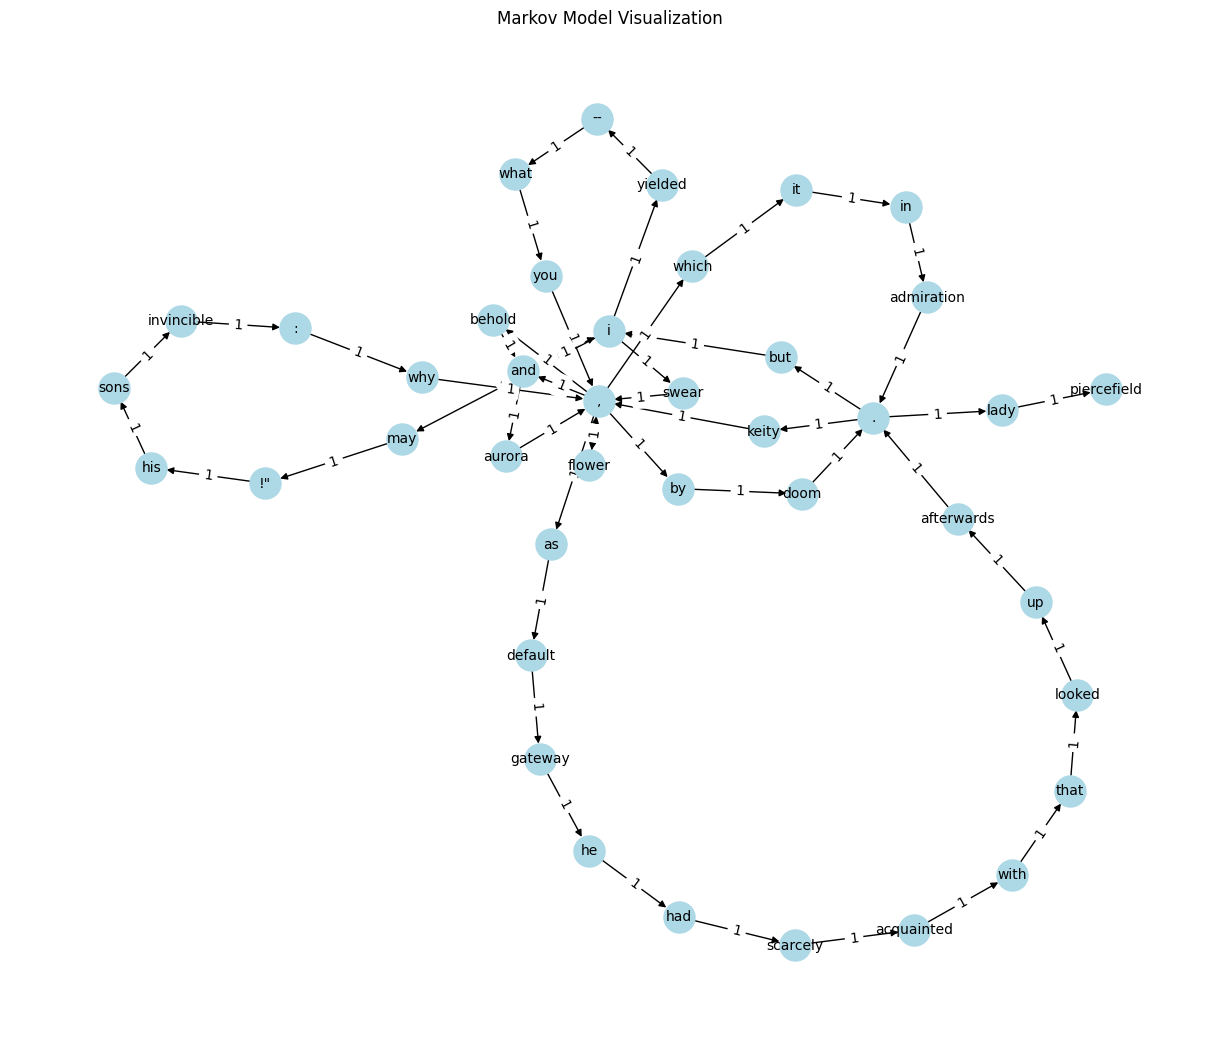

In [44]:
to_be_tokens = word_generation.lower().split() #convert to lowercase and break apart by spaces into a list
print(to_be_tokens)

to_be_model = MarkovModel()
to_be_model.train(to_be_tokens)
plt.figure(figsize=(12, 10))
to_be_model.visualize(probabilities=False)

## Example of using the visualizer

['to', 'be', ',', 'or', 'not', 'to', 'be', ',', 'that', 'is', 'the', 'question', ':', 'whether', "'tis", 'nobler', 'in', 'the', 'mind', 'to', 'suffer', 'the', 'slings', 'and', 'arrows', 'of', 'outrageous', 'fortune', ',', 'or', 'to', 'take', 'arms', 'against', 'a', 'sea', 'of', 'troubles']


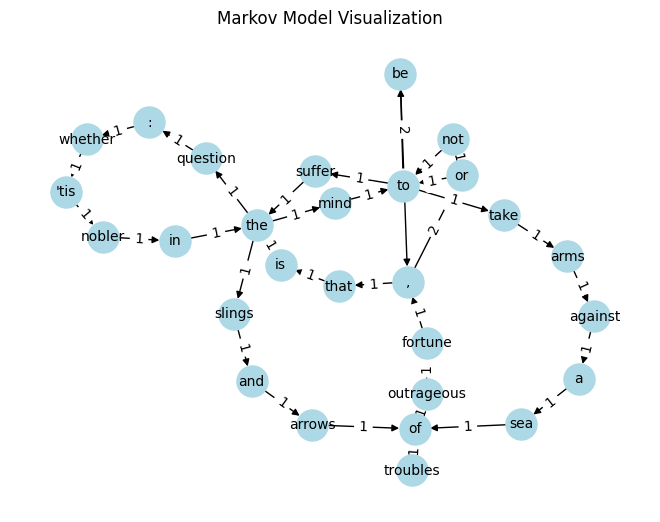

In [24]:
to_be = "To be , or not to be , that is the question : Whether 'tis nobler in the mind to suffer The slings and arrows of outrageous fortune , Or to take Arms against a Sea of troubles"
to_be_tokens = to_be.lower().split() #convert to lowercase and break apart by spaces into a list
print(to_be_tokens)

to_be_model = MarkovModel()
to_be_model.train(to_be_tokens)
to_be_model.visualize(probabilities=False)

## Applied Exploration

Enhance the `MarkovModel` class to take in a parameter that allows it to be a 1st, 2nd, 3rd, etc. order model.
* Train it with a large corpus (maybe more than one)
* Give examples of the text generated at each order
* **Do you run into difficulties with some pairs not being present? How should we deal with those - write down some ideas?:** In the code, there's a part that deals with situations where the model hasn't seen certain word pairs during training. Specifically, in the generate_random_next_word method, it checks if there are no occurrences of words following a given sequence. If there are no occurrences (when total_occurrences is 0), the code handles this by returning None. This is a way of saying, "Hey, there's no information for this sequence, so I can't provide a next word." It's a neat way to gracefully handle cases where the model hasn't encountered certain pairs in the training data.

In [48]:
from nltk.corpus import gutenberg
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import random
from pprint import pformat

class MarkovModel:

    def __init__(self, order=1):
        # empty nested dictionary mapping words to words to ints
        self.transition_counts = defaultdict(lambda: defaultdict(int))
        self.order = order

    def train(self, corpus):
        # loop through each word in the corpus record the next word
        # in its frequency dictionary
        for idx in range(len(corpus) - self.order):
            current_token = tuple(corpus[idx:idx + self.order])
            next_token = corpus[idx + self.order]
            self.transition_counts[current_token][next_token] += 1

    def generate_random_next_word(self, current_words):
        # get the frequency of all words that come after current_words
        possible_words_counts = self.transition_counts[current_words]
        # count up the total of all words that come after current_words
        total_occurrences = sum(possible_words_counts.values())

        # check if there are no occurrences
        if total_occurrences == 0:
            return None  # Handle the case when there are no occurrences

        # we are going to select one occurrence randomly
        random_num = random.randint(1, total_occurrences)

        # subtract words counts from our random number until we hit 0
        # this will hit more frequent words proportionally more often
        for word in possible_words_counts:
            random_num = random_num - possible_words_counts[word]
            if random_num <= 0:
                return word

    def generate_text(self, num=100, start_words=("I",)):
        # a running string to build on with random words
        markov_text = " ".join(start_words) + " "
        curr_words = tuple(start_words)

        # add num random words onto our running string
        for n in range(num):
            next_word = self.generate_random_next_word(curr_words)

            # handle the case when generate_random_next_word returns None
            if next_word is None:
                break

            markov_text += next_word + " "
            curr_words = curr_words[1:] + (next_word,)

        return markov_text

    def print_generated_texts(self, num_texts=5, text_length=100, start_words=("I",)):
        for _ in range(num_texts):
            generated_text = self.generate_text(num=text_length, start_words=start_words)
            print(generated_text)
            print('\n' + '-'*50 + '\n')

    def __str__(self):
        # convert defaultdicts to dicts and format using the pprint formatter
        return pformat({key: dict(self.transition_counts[key]) for key in self.transition_counts})

    def visualize(self, probabilities=False, layout=nx.kamada_kawai_layout):
        # use this method to generate visualizations of small models
        # it will take too long on large texts - don't do it!
        G = nx.DiGraph()

        if probabilities:
            transition_probabilities = defaultdict(dict)
            for current_words, next_words in self.transition_counts.items():
                total_occurrences = sum(next_words.values())
                for next_word, count in next_words.items():
                    transition_probabilities[current_words][next_word] = count / total_occurrences

            for current_words, next_words in transition_probabilities.items():
                for next_word, probability in next_words.items():
                    G.add_edge(current_words, next_word, weight=probability)
        else:
            for current_words, next_words in self.transition_counts.items():
                for next_word, count in next_words.items():
                    G.add_edge(current_words, next_word, weight=count)

        pos = layout(G)
        edge_labels = {edge: f"{G.edges[edge]['weight']}" for edge in G.edges()}
        nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=10)
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

        #plt.title("Markov Model Visualization")
        #plt.figure(figsize=(25, 14))
        #plt.show()

# Example usage:
to_be = "To be , or not to be , that is the question : Whether 'tis nobler in the mind to suffer The slings and arrows of outrageous fortune , Or to take Arms against a Sea of troubles"
to_be_tokens = to_be.lower().split()  # convert to lowercase and break apart by spaces into a list

# Train the model on the initial data
to_be_model = MarkovModel(order=2)  # Use a 2nd order model
to_be_model.train(to_be_tokens)

# Additional data for training ( will use the script from the Times Delphic regarding Affirmative Action)
additional_text = """
How does the Supreme Court ruling on affirmative action affect Drake?
The answer has little to do with affirmative action.
Over the summer, the Supreme Court ruled against the admissions programs of Harvard University and the University of North Carolina in an affirmative action decision. Before the decision, race already wasn’t a factor in Drake University admissions, according to Provost Sue Mattison.
“Affirmative action, with regards to admissions, only impacts those really highly selective institutions that limit the number of incoming students,” Mattison said. “So that doesn’t apply to Drake and most institutions across the country.”
She said schools like Harvard and UNC have enough applicants that they can pick and choose which applicants fill a certain number of spots.
Drake’s admissions team found that the university has “admitted all students who have a 3.0 high school GPA or [higher],” Mattison said. “Even though we’ve asked for a person’s race on the admissions form, it does not have an impact on the admissions decision, and it doesn’t displace anybody.”
Possible effects of the court’s ruling
Mark Kende, director of Drake’s Constitutional Law Center, said the Supreme Court “basically has embraced an idea that it calls colorblindness.”
“If you take their principle of colorblindness and extend it beyond universities, to other places, it could raise some problems,” Kende said. “But we don’t know yet.”
Financial aid programs that prioritize applicants of a particular race over another are more vulnerable after the court’s decision, according to Kende. He said it’s not clear what impact the decision might have on university hiring practices that consider an employee’s race, as well as corporations’ diversity programs.
Following the Supreme Court’s decision, Missouri Attorney General Andrew Bailey said Missouri institutions subject to the U.S. Constitution or Title VI must stop using race-based standards “to make decisions about things like admissions, scholarships, programs and employment.”
The University of Missouri System said that “a small number of our programs and scholarships have used race/ethnicity as a factor for admissions and scholarships,” and that “these practices will be discontinued.”
Drake is taking a different approach in the wake of the affirmative action decision. The university is monitoring maybe about forty to fifty scholarships, according to Ryan Zantingh, Drake’s director of financial aid. This is more in anticipation of a comparable case on financial aid that considers race, rather than a reaction to the affirmative action ruling.
Mattison said she thinks Drake is still trying to determine how the Supreme Court decision will impact Drake’s Crew Scholars program, which is for incoming students of color.
“There are ways that we can ensure that we continue Crew Scholars while still being compliant,” Mattison said.
Donors for some Drake scholarships specified that they wanted to support a student of color or a woman in a STEM field, Mattison said.
“And so we’re still working through what that actually means, and what we have to do to continue to achieve the values that we expect,” Mattison said. “There are ways that we can change the wording of some of the scholarships.”
Like all students, students of color may qualify for scholarships for first-generation students or students with financial need.
“There’s a lot of overlap between students of color and other areas where financial aid is directed,” Zantingh said. “Scholarship resources can be directed [to financial need or first generation status] and still reach the same students.”
Even if there is a ruling on financial aid that’s comparable to the affirmative action decision, Zantingh doesn’t expect a large impact on Drake financial aid from either decision.
“There may be some implications, but I think the overall general effect on students will be little to none,” Zantingh said.
Zantingh gave an example of scholarship language offered by legal counsel. If a scholarship is for only minority students, it might become a scholarship that gives preference to students who demonstrate a commitment to Drake’s vision for diversity on campus.
“If a white student is actively involved in anti-racist leadership here on campus, certainly they would fit that description then, wouldn’t they?” Zantingh said. “Basically, the language would not seek to exclude any particular protected class categorically.”
In some cases, a donor might be unwilling to change the scholarship’s language or be deceased, Zantingh said. If a donor is deceased, a judge might approve changes. He said he doesn’t expect Drake to cut any of the scholarships it is monitoring.
“The scholarship criteria would have to change, or the dollars would have to be repurposed in another way. Per either the donor or a court’s approval,” Zantingh said.
Race can still play a role in college admissions
The Supreme Court left at least one legal path open for race to play a role in college admissions.
When admitting students, universities are allowed to consider “an applicant’s discussion of how race affected his or her life, be it through discrimination, inspiration or otherwise,” Chief Justice John Roberts wrote in the Court’s decision. However, “the student must be treated based on his or her experiences as an individual — not on the basis of race.”
A student’s story can emerge without Drake asking for it, according to Dean of Admissions Joel Johnson.
“Especially if they’ve overcome a lot, or it’s so key to their identity… it’ll come out on its own,” Johnson said. “I don’t know if I could say the Supreme Court protected it. They couldn’t have stopped it, honestly.”
Johnson said that caring about diversity also means intentionally recruiting a diverse group of students. He said students can’t join Drake if they never apply in the first place.
In the wake of the Supreme Court’s decision on affirmative action, The Times-Delphic is publishing a series. Check next week’s paper for an article about legacy admissions and legacy financial aid with a Drake focus.
"""

additional_tokens = additional_text.lower().split()

# Train the model on additional data
to_be_model.train(additional_tokens)

# Generate text and print the model
to_be_model.print_generated_texts(num_texts=1, text_length=50, start_words=("a", "student"))
print(to_be_model)

# Visualize the model
#to_be_model.visualize(probabilities=False)


a student of color and other areas where financial aid that considers race, rather than a reaction to the affirmative action decision, zantingh doesn’t expect drake to cut any of the scholarships it is monitoring. “the scholarship criteria would have to be repurposed in another way. per either the donor or a 

--------------------------------------------------

{("'tis", 'nobler'): {'in': 1},
 (',', 'or'): {'not': 1, 'to': 1},
 (',', 'that'): {'is': 1},
 ('3.0', 'high'): {'school': 1},
 (':', 'whether'): {"'tis": 1},
 ('[higher],”', 'mattison'): {'said.': 1},
 ('[to', 'financial'): {'need': 1},
 ('a', '3.0'): {'high': 1},
 ('a', 'certain'): {'number': 1},
 ('a', 'commitment'): {'to': 1},
 ('a', 'comparable'): {'case': 1},
 ('a', 'court’s'): {'approval,”': 1},
 ('a', 'different'): {'approach': 1},
 ('a', 'diverse'): {'group': 1},
 ('a', 'donor'): {'is': 1, 'might': 1},
 ('a', 'drake'): {'focus.': 1},
 ('a', 'factor'): {'for': 1, 'in': 1},
 ('a', 'judge'): {'might': 1},
 ('a', 'large'): 